In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns

#1.Checking Data

In [ ]:
df = pd.read_csv("census_income_original_2.csv")
df.head()

<ipython-input-2-df76794ac81e>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("census_income_original_2.csv")


,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,income_c
0,1,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,7986
1,2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,4566
2,3,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,2571
3,4,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,8611
4,5,41,Private,Some-college,10,Separated,"Prof-,specialty",Own-child,White,Female,0,3900,40,United-States,<=50K,1553


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33333 entries, 0 to 33332
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              33333 non-null  int64 
 1   age             33333 non-null  int64 
 2   workclass       33333 non-null  object
 3   education       33333 non-null  object
 4   education.num   33333 non-null  int64 
 5   marital.status  33333 non-null  object
 6   occupation      33333 non-null  object
 7   relationship    33333 non-null  object
 8   race            33333 non-null  object
 9   Gender          33333 non-null  object
 10  capital.gain    33333 non-null  int64 
 11  capital.loss    33333 non-null  int64 
 12  hours.per.week  33333 non-null  int64 
 13  native.country  33333 non-null  object
 14  income          33333 non-null  object
 15  income_c        13190 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.1+ MB


In [ ]:
df.isna().sum()

,0
ID,0
age,0
workclass,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
Gender,0


In [ ]:
df.duplicated().sum()

304

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['race'].value_counts()

,count
race,
White,28234
Black,3151
Asian-Pac-Islander,1057
Amer-Indian-Eskimo,314
Other,273


In [ ]:
df['Gender'].unique()

array(['Female', 'female', 'Male', 'M', 'm', 'malee', 'male', 'f', 'm '],
      dtype=object)

In [ ]:
df['education'].value_counts()

,count
education,
HS-grad,10621
Some-college,7366
Bachelors,5444
Masters,1777
Assoc-voc,1403
11th,1184
Assoc-acdm,1083
10th,944
7th-8th,652


In [ ]:
df['workclass'].value_counts()

,count
workclass,
Private,22972
Self-emp-not-inc,2602
Local-gov,2131
?,1853
State-gov,1312
Self-emp-inc,1157
Federal-gov,981
Without-pay,14
Never-worked,7


In [ ]:
df['income'].value_counts()

,count
income,
<=50K,24954
>50K,8075


In [ ]:
df['education'].value_counts()

,count
education,
HS-grad,10621
Some-college,7366
Bachelors,5444
Masters,1777
Assoc-voc,1403
11th,1184
Assoc-acdm,1083
10th,944
7th-8th,652


In [ ]:
print('age range is between ',df['age'].min(), ' and ', df['age'].max())

age range is between  17  and  90


In [ ]:
df.replace('?', np.NaN, inplace=True)

##Checking Income_c column

In [ ]:
gender_map = {
    'Female': 'Female', 'female': 'Female', 'f': 'Female',
    'Male': 'Male', 'm': 'Male', 'M': 'Male', 'male': 'Male', 'malee': 'Male', 'm ': 'Male'
}


df['Gender'] = df['Gender'].map(gender_map)


df

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,income_c
0,1,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K,7986
1,2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,4566
2,3,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K,2571
3,4,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,8611
4,5,41,Private,Some-college,10,Separated,"Prof-,specialty",Own-child,White,Female,0,3900,40,United-States,<=50K,1553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33245,689,37,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,50,United-States,<=50K,7524.0
33254,698,58,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,40,United-States,<=50K,3862.0
33256,700,49,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1902,40,United-States,<=50K,3877.0
33269,713,57,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,45,United-States,<=50K,3185.0


In [ ]:
df['income'].dtype

dtype('O')

In [ ]:
df['income_c'] = pd.to_numeric(df['income_c'], errors='coerce')


In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 100],
                           labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61+'])

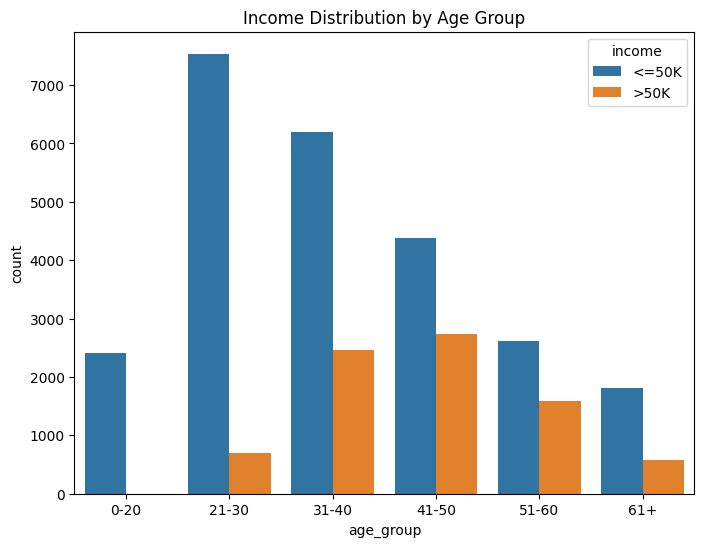

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', hue='income', data=df)
plt.title('Income Distribution by Age Group')
plt.show()

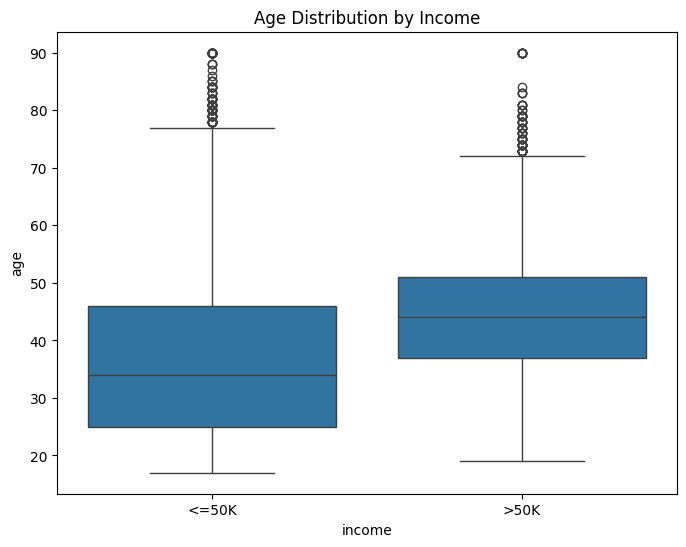

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income')
plt.show()

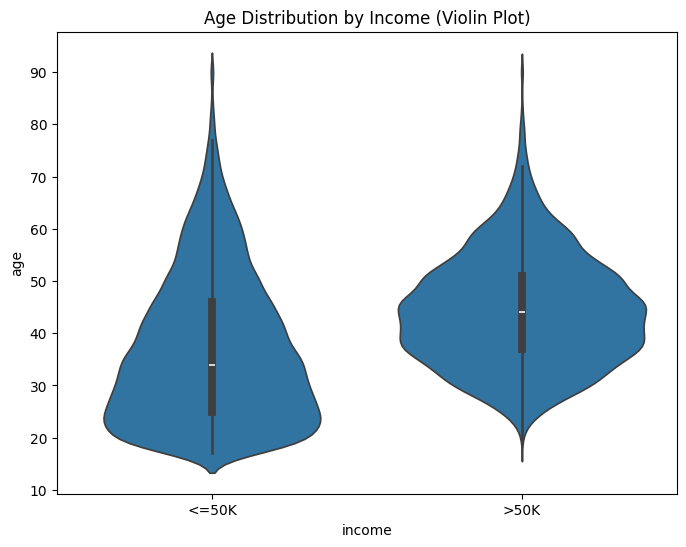

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income (Violin Plot)')
plt.show()

In [ ]:
contingency_table = pd.crosstab(df['age_group'], df['income'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)

Chi-Square Statistic: 3175.911419095845
P-value: 0.0
Degrees of Freedom: 5

Expected Frequencies:
[[1826.84222956  591.15777044]
 [6217.91213782 2012.08786218]
 [6547.31793273 2118.68206727]
 [5376.26522147 1739.73477853]
 [3181.48578522 1029.51421478]
 [1804.17669321  583.82330679]]


#2. Gender Equality

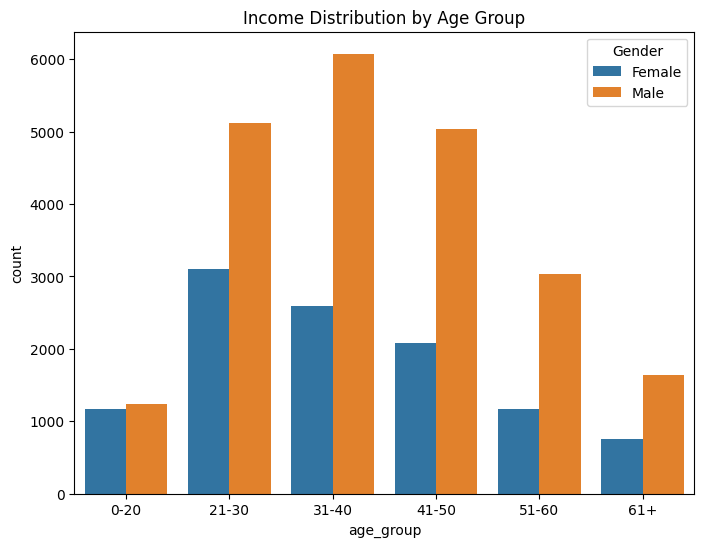

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', hue='Gender', data=df)
plt.title('Income Distribution by Age Group')
plt.show()

In [ ]:
result = df.groupby(['age_group','income']).size().unstack().sort_values(by='<=50K', ascending=False)

print(result)


income     <=50K  >50K
age_group             
21-30       7538   692
31-40       6203  2463
41-50       4374  2742
51-60       2614  1597
0-20        2416     2
61+         1809   579


<ipython-input-33-3c4d9da00b6a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(['age_group','income']).size().unstack().sort_values(by='<=50K', ascending=False)


###According to graphs and Chi-Square tests there's a correlation between gender and high income.

#3.Other Attributes

##Race:

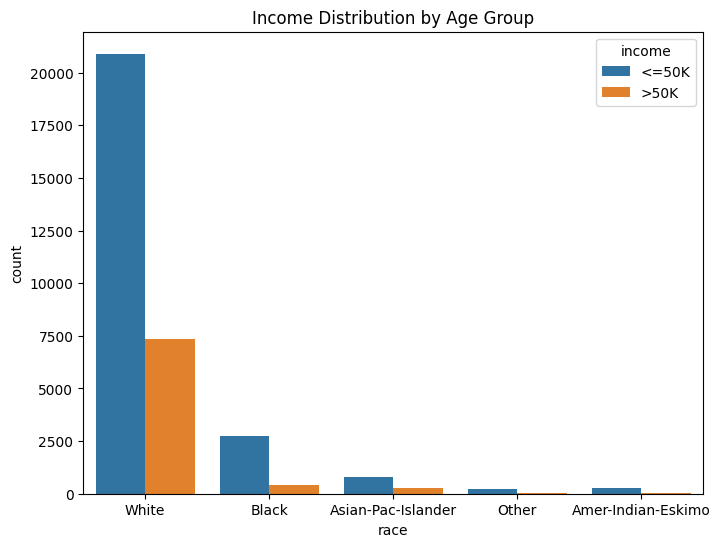

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='income', data=df)
plt.title('Income Distribution by Age Group')
plt.show()

In [ ]:
result = df.groupby(['race','income']).size().unstack().sort_values(by='<=50K', ascending=False)

print(result)

income              <=50K  >50K
race                           
White               20899  7335
Black                2756   395
Asian-Pac-Islander    774   283
Amer-Indian-Eskimo    277    37
Other                 248    25


In [ ]:
contingency_table = pd.crosstab(df['race'], df['income'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)

Chi-Square Statistic: 342.8338737178059
P-value: 6.182300953252689e-73
Degrees of Freedom: 4

Expected Frequencies:
[[  237.23261376    76.76738624]
 [  798.58239729   258.41760271]
 [ 2380.6368343    770.3631657 ]
 [  206.25638076    66.74361924]
 [21331.2917739   6902.7082261 ]]


###According to graphs and Chi-Square tests there's a correlation between race and high income.

##Education:

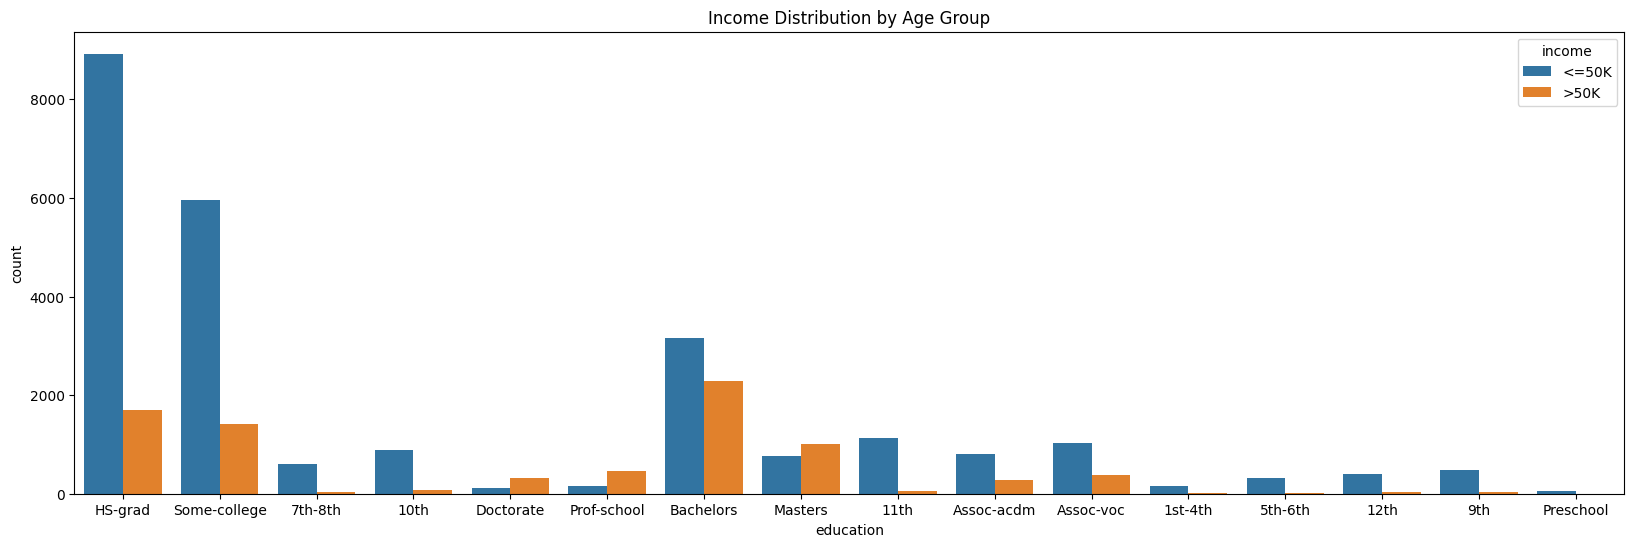

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='education', hue='income', data=df)
plt.title('Income Distribution by Age Group')
plt.show()

In [ ]:
result = df.groupby(['education','income']).size().unstack().sort_values(by='<=50K', ascending=False)

print(result)

income         <=50K    >50K
education                   
HS-grad       8924.0  1697.0
Some-college  5952.0  1414.0
Bachelors     3159.0  2285.0
11th          1123.0    61.0
Assoc-voc     1031.0   372.0
10th           877.0    67.0
Assoc-acdm     812.0   271.0
Masters        774.0  1003.0
7th-8th        612.0    40.0
9th            487.0    28.0
12th           401.0    33.0
5th-6th        324.0    16.0
1st-4th        164.0     6.0
Prof-school    155.0   458.0
Doctorate      108.0   324.0
Preschool       51.0     NaN


In [ ]:
contingency_table = pd.crosstab(df['education'], df['income'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)

Chi-Square Statistic: 4659.070676314721
P-value: 0.0
Degrees of Freedom: 15

Expected Frequencies:
[[ 713.20887705  230.79112295]
 [ 894.53316782  289.46683218]
 [ 327.89475915  106.10524085]
 [ 128.4380393    41.5619607 ]
 [ 256.8760786    83.1239214 ]
 [ 492.5976566   159.4023434 ]
 [ 389.09170729  125.90829271]
 [ 818.22586212  264.77413788]
 [1059.99158315  343.00841685]
 [4113.03932907 1330.96067093]
 [ 326.38372339  105.61627661]
 [8024.35538466 2596.64461534]
 [1342.55526961  434.44473039]
 [  38.53141179   12.46858821]
 [ 463.13245935  149.86754065]
 [5565.14469103 1800.85530897]]


###According to graphs and Chi-Square tests there's a correlation between Education and high income.